In [3]:
import numpy as np
import torch
from sudoku import Sudoku
from matplotlib import pyplot as plt
from deepsudoku.utils import sudoku_utils, data_utils
import deepsudoku as ds
from datetime import datetime
from time import time


In [4]:
data_utils.split_data()
train_sudokus, val_sudokus, test_sudokus = data_utils.load_data()


In [5]:
def all_but_one_distribution():
    possible_numbers_of_moves_to_make = list(range(0,64))
    probabilities = [0]*64
    probabilities[63] = 1
    return possible_numbers_of_moves_to_make, probabilities

def n_moves_distribution(n):
    possible_numbers_of_moves_to_make = list(range(0,64))
    probabilities = [0]*64
    probabilities[n-1] = 1
    return possible_numbers_of_moves_to_make, probabilities

def natural_distribution():
    possible_numbers_of_moves_to_make = list(range(0,64))
    with open("data/natural_distribution.np", 'rb') as f:
        probabilities = np.load(f)
    probabilities = probabilities/sum(probabilities)
    return possible_numbers_of_moves_to_make, probabilities

train_sudokus = data_utils.make_moves(train_sudokus, natural_distribution)
val_sudokus = data_utils.make_moves(val_sudokus, natural_distribution)
test_sudokus = data_utils.make_moves(test_sudokus, natural_distribution)


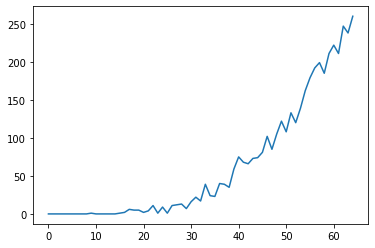

In [6]:
totals = np.zeros(65)
for sudoku in train_sudokus:
    totals[len(np.argwhere(sudoku[0]==0))] +=1
plt.plot(totals)

In [5]:
x_train, y_train = data_utils.fast_generate_batch(train_sudokus)
x_train = torch.tensor(x_train.reshape(-1,1,9,9).astype('float32'))
y_train = torch.tensor(y_train - 1).type(torch.LongTensor)

In [6]:
x_val, y_val = data_utils.generate_batch(val_sudokus, augment = False)
x_val = torch.tensor(x_val.reshape(-1,1,9,9).astype('float32')).cuda()
y_val = torch.tensor(y_val - 1).type(torch.LongTensor).cuda()

In [7]:
model = ds.model.SimpleNet()
model.to('cuda')
optimizer = torch.optim.Adam(model.parameters(), amsgrad = True)
loss_fn = torch.nn.CrossEntropyLoss()

val_losses = []
losses = []

In [ ]:
min_val_loss = 100
n_epochs = 100000
# # load the model checkpoint
# checkpoint = torch.load('./documentation/models/2/model.pth')
# # load model weights state_dict
# model.load_state_dict(checkpoint['model_state_dict'])
# print('Previously trained model weights state_dict loaded...')
# # load trained optimizer state_dict
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# print('Previously trained optimizer state_dict loaded...')
# start_epoch = checkpoint['epoch']
# # load the criterion
# loss = checkpoint['loss']
# print('Trained model loss function loaded...')
# min_val_loss = loss

for epoch in range(0, n_epochs):
    model.train()
    x_train, y_train = data_utils.fast_generate_batch(train_sudokus)
    x_train = torch.tensor(x_train.reshape(-1,1,9,9).astype('float32'))
    y_train = torch.tensor(y_train - 1).type(torch.LongTensor)
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    
    y_pred = model(x_train)
    y_pred = y_pred.cuda()
    
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    
    loss.backward()
    
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1)
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        y_pred_val = model(x_val)
        val_loss = loss_fn(y_pred_val, y_val)
        
    val_losses.append(val_loss.item())
    losses.append(loss.item())
    
    if (epoch % 1000) == 0:
        torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,
                    }, './documentation/models/2/epoch%d_loss%.3f.pth' % (epoch,val_loss))
    if val_loss < min_val_loss:
        torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss,
                    }, './documentation/models/2/best.pth')
        min_val_loss = val_loss
        
    print(f'Epoch {epoch}, loss = {loss.item():.4f}, validation loss = {val_loss.item():.4f}, time = {datetime.now()}.', end = "\r")
    
    
    

In [ ]:
plt.plot(val_losses)

In [45]:
for i in range(1, 64):
    

torch.Size([2, 1, 9, 9])

In [51]:
x_val_np = x_val.cpu().numpy()

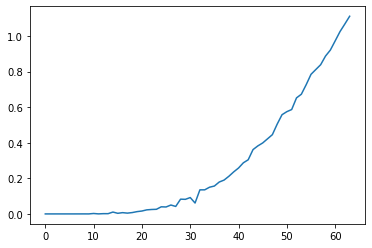

In [135]:
plt.plot(val_losses_i)

In [1]:
len(val_losses_i)

NameError: name 'val_losses_i' is not defined

In [65]:
max_norm = 0
for p in model.parameters():
    param_norm = p.grad.data.norm(2)
    if param_norm > max_norm:
        max_norm = param_norm
max_norm

tensor(24.8296, device='cuda:0')

In [63]:
    torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'loss': loss,
                }, './documentation/models/2/model.pth')

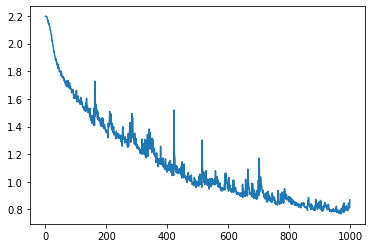

In [35]:
plt.plot(losses)

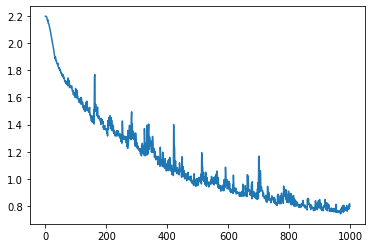

In [38]:
plt.plot(val_losses)

In [23]:
x_train, y_train = data_utils.fast_generate_batch(train_sudokus)


In [19]:
x_train, y_train = data_utils.fast_generate_batch(train_sudokus)


In [20]:
x_train[0]

array([[0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 8, 0, 0, 9],
       [6, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 1, 5],
       [0, 0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 9, 0, 0, 0, 4, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 8],
       [0, 0, 0, 0, 6, 1, 0, 0, 0]], dtype=uint8)

In [21]:
x_train, y_train = data_utils.fast_generate_batch(train_sudokus)


In [35]:
x_train[0]

tensor([[[0., 0., 0., 7., 0., 9., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 6.],
         [0., 0., 0., 0., 0., 0., 1., 2., 8.],
         [0., 0., 0., 0., 0., 5., 0., 0., 0.],
         [0., 2., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 4., 1., 3., 0., 0.],
         [0., 0., 0., 2., 8., 0., 0., 0., 0.],
         [3., 0., 0., 0., 0., 0., 0., 9., 0.],
         [0., 0., 1., 0., 0., 0., 4., 0., 0.]]])

In [36]:
y_train[0]

tensor([[5, 7, 1, 6, 0, 8, 4, 2, 3],
        [3, 0, 2, 7, 4, 1, 8, 6, 5],
        [6, 4, 8, 3, 2, 5, 0, 1, 7],
        [0, 2, 5, 8, 1, 4, 7, 3, 6],
        [4, 1, 3, 2, 6, 7, 5, 0, 8],
        [7, 8, 6, 5, 3, 0, 2, 4, 1],
        [8, 3, 4, 1, 7, 2, 6, 5, 0],
        [2, 6, 7, 0, 5, 3, 1, 8, 4],
        [1, 5, 0, 4, 8, 6, 3, 7, 2]])

In [46]:
np.argwhere(y_pred[0,:,0,:].cpu() > -0.2)

tensor([[0, 2, 4, 6, 6, 6, 7, 8, 8, 8],
        [3, 5, 8, 4, 6, 8, 4, 3, 4, 8]])

In [41]:
y_pred[0].cpu().shape

torch.Size([9, 9, 9])

In [51]:
y_pred[0,:,0,8]

tensor([-0.9362, -4.6014, -0.5402, -0.2921,  0.2304, -0.3378, -0.1828, -0.4231,
         0.0343], device='cuda:0', grad_fn=<SelectBackward>)

In [52]:
torch.save(model, "documentation/models/1/state_dict.pt")

PicklingError: Can't pickle <class '__main__.simpleNet'>: it's not the same object as __main__.simpleNet

In [82]:
%%timeit
for i in range(4062):
    sudoku_utils.make_random_moves(board, solved, 20, 0)

197 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
tots = np.zeros(100)
for i, sudoku in enumerate(new_train_sudokus):
    moves_made = len(np.argwhere(sudoku[0] != 0)) - 17
    tots[moves_made] += 1

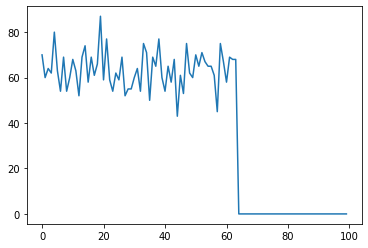

In [25]:
plt.plot(tots)

In [36]:
def all_but_one_distribution():
    possible_numbers_of_moves_to_make = list(range(0,64))
    probabilities = [0]*64
    probabilities[63] = 1
    return possible_numbers_of_moves_to_make, probabilities

In [40]:
new_train_sudokus[0][0]

array([[6, 9, 3, 7, 8, 4, 5, 1, 2],
       [4, 8, 7, 5, 1, 2, 9, 3, 6],
       [1, 2, 5, 9, 6, 3, 8, 7, 4],
       [9, 3, 2, 6, 5, 1, 4, 8, 7],
       [5, 6, 8, 2, 4, 7, 3, 9, 1],
       [0, 4, 1, 3, 9, 8, 6, 2, 5],
       [3, 1, 9, 4, 7, 5, 2, 6, 8],
       [8, 5, 6, 1, 2, 9, 7, 4, 3],
       [2, 7, 4, 8, 3, 6, 1, 5, 9]], dtype=uint8)

In [107]:
x_train[0,0, 6, 7]

tensor(0., device='cuda:0')

In [98]:
y = model(x_train[0].reshape(-1, 1, 9, 9))

In [119]:
a = y[0,:].cpu().detach().numpy()

In [126]:
m = torch.nn.Softmax()
m(y[0,:,6,7])


<ipython-input-126-dff5b86ba716>:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  m(y[0,:,6,7])


tensor([3.8428e-05, 2.2237e-01, 4.7696e-03, 1.7718e-02, 7.1976e-02, 4.3815e-01,
        2.2063e-01, 2.3932e-02, 4.2340e-04], device='cuda:0',
       grad_fn=<SoftmaxBackward>)

In [116]:
y_train[0]

tensor([[0, 2, 7, 6, 3, 5, 4, 8, 1],
        [5, 4, 3, 8, 1, 2, 0, 6, 7],
        [6, 1, 8, 7, 0, 4, 5, 3, 2],
        [2, 7, 4, 0, 8, 6, 3, 1, 5],
        [8, 6, 1, 5, 4, 3, 2, 7, 0],
        [3, 5, 0, 1, 2, 7, 8, 4, 6],
        [4, 0, 6, 2, 7, 8, 1, 5, 3],
        [7, 8, 2, 3, 5, 1, 6, 0, 4],
        [1, 3, 5, 4, 6, 0, 7, 2, 8]], device='cuda:0')

In [79]:
y_train[0]

tensor([[8, 2, 1, 0, 4, 3, 5, 6, 7],
        [3, 5, 4, 2, 6, 7, 0, 1, 8],
        [7, 0, 6, 8, 5, 1, 3, 4, 2],
        [1, 8, 0, 5, 7, 2, 4, 3, 6],
        [6, 4, 3, 1, 8, 0, 2, 7, 5],
        [2, 7, 5, 4, 3, 6, 8, 0, 1],
        [4, 3, 2, 7, 1, 8, 6, 5, 0],
        [0, 6, 7, 3, 2, 5, 1, 8, 4],
        [5, 1, 8, 6, 0, 4, 7, 2, 3]], device='cuda:0')

In [83]:
y[0,:,0,0]

tensor([-61.6282, -71.7021, -58.5719, -95.3305, -73.5535, -46.4773,  -1.0167,
         21.3101,  26.0130], device='cuda:0', grad_fn=<SelectBackward>)

In [82]:
x_train[0,0,0,0]

tensor(9., device='cuda:0')

In [84]:
x = x_train[0]